In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#import zipfile
import pandas as pd
import pyarrow.parquet as pq
#import matplotlib.pyplot as plt
#import numpy as np

WORK_PATH = '/content/gdrive/MyDrive/DataFusionContest/'

In [ ]:
df = pd.read_parquet(WORK_PATH + 'train.parquet', columns=['item_name', 'category_id']) #, filters=[('category_id', '=', val)])
#df = pd.read_parquet(WORK_PATH + 'train.parquet', engine='pyarrow') #, chunksize=1000)
#dq = pq.ParquetFile(WORK_PATH + 'train.parquet')
#print(dq.metadata)
#print(dq.schema)
df.info()
#dq1 = pq.read_table(WORK_PATH + 'train.parquet', columns=['receipt_id ', 'item_name', 'category_id'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26094077 entries, 0 to 45729315
Data columns (total 2 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   item_name    object
 1   category_id  int64 
dtypes: int64(1), object(1)
memory usage: 597.2+ MB


In [ ]:
print(df['category_id'].min())
print(df['category_id'].max())

-1
204


In [ ]:
print(df.head(10))

                                            item_name  category_id
0                    Флуконазол капс 150мг №1 Вертекс           -1
1                                      Молоко 3,2%,шт           78
2    Борщ Станичный с тушенкой, 103 ккал (завод, з/у)           -1
3                           Компот из изюма, 114 ккал           71
4   Макаронные изделия отварные (масло сливочное),...           71
6                Филе Горизонт (филе птицы), 218 ккал           -1
10                       3  Бумага Упак 1/Прочи/В асс           -1
11                       4  Бумага Упак 1/Прочи/В асс           -1
12                        Брюки спорт мал SAMO M-1016           -1
13                                  Бюстгальтер БН137           -1


In [ ]:
df2 = df.query('category_id >= 0')
print(df2.head(10))

                                            item_name  category_id
1                                      Молоко 3,2%,шт           78
3                           Компот из изюма, 114 ккал           71
4   Макаронные изделия отварные (масло сливочное),...           71
17                      Кофе Капучино Большой Эден 18           70
40                             Хлеб на СЫВОРОТКЕ 350г           84
53                     Сосиска в тесте с сыром 1шт ГЕ           84
58     ЛанчБаскет 5 за 300: 2 шт ОРИГ Стрипсы кур фил           69
62                                Станд Картофель фри           69
63                                 Хот-дог Куриный СБ           69
64                               Чизбургер с луком СБ           68


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6483226 entries, 1 to 45729281
Data columns (total 2 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   item_name    object
 1   category_id  int64 
dtypes: int64(1), object(1)
memory usage: 148.4+ MB


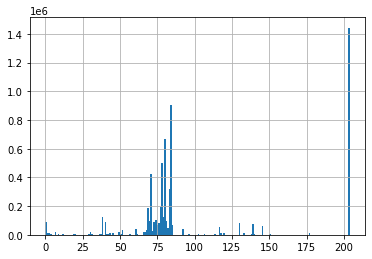

In [ ]:
df2['category_id'].hist(bins=200)

In [ ]:
print(df2['category_id'].min())
print(df2['category_id'].max())
print(len(df2['category_id'].unique()))

0
204
98


In [ ]:
ptable = pd.pivot_table(df2, index=['category_id'], values='item_name', aggfunc='count')
print(ptable)

             item_name
category_id           
0                92280
1                  226
2                15502
3                12159
4                 3930
...                ...
164               1388
167               2064
177              11764
203            1307260
204             136271

[98 rows x 1 columns]


In [ ]:
import numpy as np

df2['category_id'] = df2['category_id'].astype(np.uint8)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df2.to_csv(WORK_PATH + 'clean.csv', index=False)

In [ ]:
df3 = df[df.item_name.str.contains('Кофе', case=False)]
print(df3.head(50))

                                               item_name  category_id
17                         Кофе Капучино Большой Эден 18           70
94                Кофе Несткафе голд сигначер 95г стекло           -1
166                               Кофе АМЕРИКАНО средний           70
363                       95 Г КОФЕ РАСТ АМБАСС ПЛАТИНУМ           -1
1061                                 ПЕЧ.К КОФЕ С ШОК ВК           84
1134                              Раф кофе кокосовый, шт           -1
1215                Кофе Грейт Бин Голд 100г стекло (12)           -1
1231                                  0.3 Кофе Американо           70
1681           Кофе растворимый Маккофе Original 3в1 20г           85
1932                         250Г КОФЕ LAVAZZA ORO ЗЕРНО           -1
2519    Кофе Жардин мяг упаковка 150гр. № 4 Гватемала шт           -1
2935                      Кофе Латте Стандартный Эден 18           70
3243              Печенье Кухмастер К кофе сахарное 220г           -1
3619                

In [ ]:
print(df[df['category_id'] == -1].count())

receipt_id     19610851
item_name      19610851
category_id    19610851
dtype: int64


In [ ]:
dfCoffee = df[df.item_name.str.contains('Кофе', case=False)].head(1000)
dfCoffee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 17 to 232802
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   item_name    1000 non-null   object
 1   category_id  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 23.4+ KB


In [ ]:
dfCoffee.to_csv(WORK_PATH + 'coffee.csv', index=False)